In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import random
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
from functools import wraps
from typing import Any, Dict, List, Tuple

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree


from categorical_features_sklearn import GiniRunner, EntropyRunner, TreeBaseRunner

<IPython.core.display.Javascript object>

# Create categorical data

In [3]:
np.random.seed(42)
N = 150

CAT_FEATURE_1 = np.random.choice([0, 1, 2], p=[0.3, 0.3, 0.4], size=(N,))
CAT_FEATURE_2 = np.random.choice([10, 20, 30], p=[0.3, 0.6, 0.1], size=(N,))

TARGET = np.random.choice([0, 1], p=[0.5, 0.5], size=(N,))

original_df = pd.DataFrame(
    data={"feature_1": CAT_FEATURE_1, "feature_2": CAT_FEATURE_2, "label": TARGET}
)

df = pd.DataFrame()
for feature in ["feature_1", "feature_2"]:
    df = pd.concat(
        [pd.get_dummies(original_df[feature]).add_prefix(f"{feature}_"), df], axis=1
    )

df["label"] = original_df["label"]

df

,feature_2_10,feature_2_20,feature_2_30,feature_1_0,feature_1_1,feature_1_2,label
0,0,0,1,0,1,0,0
1,1,0,0,0,0,1,1
2,1,0,0,0,0,1,1
3,0,1,0,0,1,0,1
4,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...
145,0,1,0,1,0,0,1
146,0,1,0,0,0,1,1
147,1,0,0,0,1,0,1
148,0,1,0,1,0,0,0


<IPython.core.display.Javascript object>

In [4]:
X = df.drop(["label"], axis=1)
y = df["label"]

<IPython.core.display.Javascript object>

In [5]:
clf = DecisionTreeClassifier(splitter="best", criterion="entropy", random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

<IPython.core.display.Javascript object>

[Text(0.640625, 0.9, 'feature_1_0 <= 0.5\nentropy = 0.999872\nsamples = 150\nvalue = [74, 76]\nclass = 1'),
 Text(0.40625, 0.7, 'feature_2_30 <= 0.5\nentropy = 0.998159\nsamples = 99\nvalue = [52, 47]\nclass = 0'),
 Text(0.25, 0.5, 'feature_1_2 <= 0.5\nentropy = 0.999913\nsamples = 91\nvalue = [46, 45]\nclass = 0'),
 Text(0.125, 0.3, 'feature_2_10 <= 0.5\nentropy = 0.995727\nsamples = 39\nvalue = [18, 21]\nclass = 1'),
 Text(0.0625, 0.1, 'entropy = 0.998846\nsamples = 25\nvalue = [12, 13]\nclass = 1'),
 Text(0.1875, 0.1, 'entropy = 0.985228\nsamples = 14\nvalue = [6, 8]\nclass = 1'),
 Text(0.375, 0.3, 'feature_2_10 <= 0.5\nentropy = 0.995727\nsamples = 52\nvalue = [28, 24]\nclass = 0'),
 Text(0.3125, 0.1, 'entropy = 0.991076\nsamples = 36\nvalue = [20, 16]\nclass = 0'),
 Text(0.4375, 0.1, 'entropy = 1.0\nsamples = 16\nvalue = [8, 8]\nclass = 0'),
 Text(0.5625, 0.5, 'feature_1_2 <= 0.5\nentropy = 0.811278\nsamples = 8\nvalue = [6, 2]\nclass = 0'),
 Text(0.5, 0.3, 'entropy = 0.721928\nsa

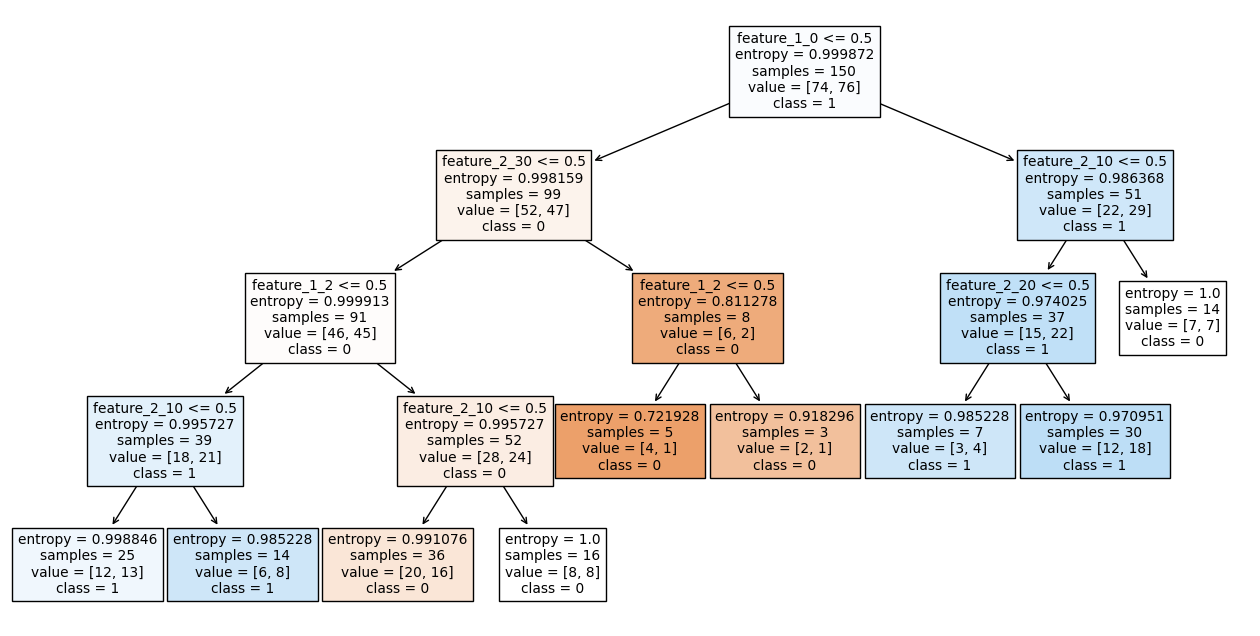

<IPython.core.display.Javascript object>

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

plot_tree(
    clf, feature_names=X.columns, class_names=["0", "1"], filled=True, precision=6
)

# Run

In [7]:
IMPURITY_RUNNER = EntropyRunner()

<IPython.core.display.Javascript object>

In [8]:
def iteration(x, y, impurity_runner=IMPURITY_RUNNER):
    tree_runner = TreeBaseRunner(x, y, impurity_runner=IMPURITY_RUNNER)
    best_feature_to_split_on, best_label_to_split_on = tree_runner.get_splits()

    split_good, split_bad = tree_runner.run()

    return split_good, split_bad

<IPython.core.display.Javascript object>

In [9]:
# Follow path with the lower gini impurity at each split

split_good, split_bad = iteration(X, y)
for i in range(4):
    split_good, split_bad = iteration(*split_good)

impurity: 0.999871756640849
samples: 150
value: Counter({1: 76, 0: 74})
best_feature_to_split_on: feature_1_0, best_feature_label_to_split_on: 1


impurity: 0.9863676072907088
samples: 51
value: Counter({1: 29, 0: 22})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 0


impurity: 0.9740248644357521
samples: 37
value: Counter({1: 22, 0: 15})
best_feature_to_split_on: feature_2_20, best_feature_label_to_split_on: 1


impurity: 0.9709505944546686
samples: 30
value: Counter({1: 18, 0: 12})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 0


impurity: 0.9709505944546686
samples: 30
value: Counter({1: 18, 0: 12})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 0




<IPython.core.display.Javascript object>

In [10]:
# follow path with the highest impurity at each split

split_good, split_bad = iteration(X, y)
for i in range(4):
    split_good, split_bad = iteration(*split_bad)

impurity: 0.999871756640849
samples: 150
value: Counter({1: 76, 0: 74})
best_feature_to_split_on: feature_1_0, best_feature_label_to_split_on: 1


impurity: 0.9981592324817737
samples: 99
value: Counter({0: 52, 1: 47})
best_feature_to_split_on: feature_2_30, best_feature_label_to_split_on: 1


impurity: 0.9999128895013562
samples: 91
value: Counter({0: 46, 1: 45})
best_feature_to_split_on: feature_1_1, best_feature_label_to_split_on: 0


impurity: 0.9957274520849255
samples: 39
value: Counter({1: 21, 0: 18})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 1


impurity: 0.9988455359952018
samples: 25
value: Counter({1: 13, 0: 12})
best_feature_to_split_on: feature_2_10, best_feature_label_to_split_on: 0




<IPython.core.display.Javascript object>

# Feature importance

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

In [11]:
df.columns

Index(['feature_2_10', 'feature_2_20', 'feature_2_30', 'feature_1_0',
       'feature_1_1', 'feature_1_2', 'label'],
      dtype='object')

<IPython.core.display.Javascript object>

In [12]:
clf.feature_importances_

array([0.13784903, 0.00438532, 0.42422006, 0.27262954, 0.        ,
       0.16091605])

<IPython.core.display.Javascript object>

In [13]:
clf.tree_.compute_feature_importances(normalize=False)

array([2.89303779e-03, 9.20346550e-05, 8.90310717e-03, 5.72167672e-03,
       0.00000000e+00, 3.37714549e-03])

<IPython.core.display.Javascript object>

In [14]:
pd.DataFrame(
    index=df.drop(["label"], axis=1).columns,
    data=clf.tree_.compute_feature_importances(normalize=False),
    columns=["feature_importance"],
).sort_values("feature_importance", ascending=False)

,feature_importance
feature_2_30,0.008903
feature_1_0,0.005722
feature_1_2,0.003377
feature_2_10,0.002893
feature_2_20,0.000092
feature_1_1,0.000000


<IPython.core.display.Javascript object>

## Find node importance

$$n_j = w_j\cdot \left({impurity}_j - w_\text{left_child}\cdot {impurity}_\text{left_child} -  w_\text{right_child}\cdot {impurity}_\text{right_child}\right)$$

In [15]:
L = np.zeros(shape=(4, 4))

<IPython.core.display.Javascript object>

## 1st level nodes importances

In [24]:
L[0, 0] = (150 / 150) * (0.999872 - (99 / 150) * 0.998159 - (51 / 150) * 0.986368)
L[0, 0]

0.00572193999999987

<IPython.core.display.Javascript object>

## 2nd level nodes importances

In [17]:
L[1, 0] = (99 / 150) * (0.998159 - (91 / 99) * 0.99991 - (8 / 99) * 0.81128)
L[1, 1] = (51 / 150) * (0.986368 - (37 / 51) * 0.97402 - (14 / 51) * 1)

<IPython.core.display.Javascript object>

## 3rd level nodes importances

In [18]:
L[2, 0] = (91 / 150) * (0.99991 - (39 / 91) * 0.99573 - (52 / 91) * 0.99573)
L[2, 1] = (8 / 150) * (0.81128 - (5 / 8) * 0.72193 - (3 / 8) * 0.9183)
L[2, 2] = (37 / 150) * (0.97402 - (7 / 37) * 0.98523 - (30 / 37) * 0.97095)

<IPython.core.display.Javascript object>

## 4th level nodes importances

In [19]:
L[3, 0] = (39 / 150) * (0.99573 - (25 / 39) * 0.99885 - (14 / 39) * 0.98523)
L[3, 1] = (52 / 150) * (0.99573 - (36 / 52) * 0.99108 - (16 / 52) * 1)


<IPython.core.display.Javascript object>

In [20]:
print(L)

[[5.72194000e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.90460667e-03 1.77352000e-03 0.00000000e+00 0.00000000e+00]
 [2.53586667e-03 8.37933333e-04 9.08666667e-05 0.00000000e+00]
 [4.60000000e-04 6.60533333e-04 0.00000000e+00 0.00000000e+00]]


<IPython.core.display.Javascript object>

In [21]:
feature_2_30_importance = L[1, 0]
feature_2_30_importance

0.00890460666666666

<IPython.core.display.Javascript object>

In [22]:
feature_1_0_importance = L[0, 0]
feature_1_0_importance

0.00572193999999987

<IPython.core.display.Javascript object>

In [23]:
feature_2_10_importance = L[3, 0] + L[3, 1] + L[1, 1]
feature_2_10_importance

0.0028940533333333216

<IPython.core.display.Javascript object>